# First I imported the libraries I would need along with my data 

In [318]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import datacompy

In [319]:
data_demo = pd.read_csv('data_demo.csv',encoding='ISO-8859–1')
data_diet = pd.read_csv('data_diet.csv',encoding='ISO-8859–1')
data_exam = pd.read_csv('data_exam.csv',encoding='ISO-8859–1')
data_labs = pd.read_csv('data_labs.csv',encoding='ISO-8859–1')
data_meds = pd.read_csv('data_meds.csv',encoding='ISO-8859–1')
data_ques = pd.read_csv('data_ques.csv',encoding='ISO-8859–1')

# Here is where I started seperating data out to condense the hundreds of columns down to something more manageable for the process. Columns used were ones where data indicated told me about the persons health or diet. Lables for colums were found using a guide pook published for this survey.

In [320]:
data_demo_need = data_demo[['SEQN','RIAGENDR','RIDAGEYR']]


In [321]:
data_diet_need = data_diet[['SEQN','DR1DRSTZ','DRQSDIET','DRQSDT1','DRQSDT2','DRQSDT3','DRQSDT4','DRQSDT5',
                            'DRQSDT6','DRQSDT7','DRQSDT8','DRQSDT9','DRQSDT10','DRQSDT11','DRQSDT12','DRQSDT91'
                           ,'DR1TKCAL','DR1TPROT','DR1TCARB','DR1TSUGR','DR1TTFAT','DR1TCHOL','DR1TALCO',
                            'DR1.300','DR1.320Z',]]

#for DR1DRSTZ use only 1 or 4 values as they are reliable

In [322]:
data_exam_need = data_exam[['SEQN','PEASCST1','BPXPULS','BMDSTATS','BMXWT','BMXHT','BMXRECUM']]
#combine BMXHT and BMXRECUM

In [323]:
data_meds_need = data_meds[['SEQN','RXDUSE','RXDRSD1']]
#RXDUSE(takes meds) yes = 2, no = 1, RXDRSD1 = disorders

In [324]:
#data_ques
data_ques_need = data_ques[['SEQN','ALQ130','BPQ020', 'BPQ080','DIQ010','DIQ160',"DBQ700","DEQ034D"
                           ,'DUQ200','DUQ240','HEQ010','HEQ030','HUQ010','MCQ010','MCQ070','MCQ160A'
                           ,'MCQ160M','MCQ160B','MCQ160C','MCQ160D','MCQ160E','MCQ160F','MCQ160G','MCQ160K','MCQ160L'
                           ,'MCQ160O','MCQ220','MCQ203','OSQ060','PAQ650','PAQ605','PAQ620','PAQ665','SLD010H','SMQ020'
                           ,'SXQ272','SXQ270','SXQ265','SXQ260']]

# I then merged together the files to start getting everything together

In [325]:
df = pd.merge(data_demo_need,data_diet_need,how = 'inner',on = 'SEQN')
df = pd.merge(data_exam_need,df,how = 'inner',on = 'SEQN')
df = pd.merge(data_meds_need,df,how = 'inner',on = 'SEQN')
df = pd.merge(data_ques_need,df,how = 'inner',on = 'SEQN')

# I removed duplicates of the participent ID to prevent reuse of a participent


In [326]:
df=df.drop_duplicates(subset=['SEQN'])
df = df.loc[:,~df.columns.duplicated()]

# Merge certain columns to condense down information.

In [327]:
#changed values of DRQSDIET so when summing up, the values are easy to pick out
df['DRQSDIET']=df['DRQSDIET'].replace(to_replace = 1, value = 0)
df['DRQSDIET']=df['DRQSDIET'].replace(to_replace = 2, value = 200)
df['DRQSDIET']=df['DRQSDIET'].replace(to_replace = 9, value = 900)
cols = ['DRQSDIET','DRQSDT1','DRQSDT2','DRQSDT3','DRQSDT4','DRQSDT5','DRQSDT6','DRQSDT7','DRQSDT8','DRQSDT9','DRQSDT10','DRQSDT11','DRQSDT12','DRQSDT91']
df['Diet Type'] = df[cols].sum(1)
df = df.drop(cols, 1)


#Both are height
cols2 = ['BMXHT', 'BMXRECUM']
df['Height'] = df[cols2].sum(1)
df = df.drop(cols2,1)

C:\Users\nicol\AppData\Local\Temp/ipykernel_11068/1621829680.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop(cols, 1)
C:\Users\nicol\AppData\Local\Temp/ipykernel_11068/1621829680.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop(cols2,1)


# Rename columns and replace values with lables

In [328]:

#Replace values with lables in Diet Type
df['Diet Type']=df['Diet Type'].replace(to_replace = 1.0, value = 'Weight Loss or Low Calorie Diet')
df['Diet Type']=df['Diet Type'].replace(to_replace = 2.0, value = 'Low Fat or Low Cholesterol Diet')
df['Diet Type']=df['Diet Type'].replace(to_replace = 3.0, value = 'Low Salt or Low Sodium Diet')
df['Diet Type']=df['Diet Type'].replace(to_replace = 4.0, value = 'Sugar Free or Low Sugar Diet')
df['Diet Type']=df['Diet Type'].replace(to_replace = 5.0, value  = 'Low Fiber Diet')
df['Diet Type']=df['Diet Type'].replace(to_replace=6.0,value = 'High Fiber Diet')
df['Diet Type']=df['Diet Type'].replace(to_replace=7.0,value = 'Diabetic Diet')
df['Diet Type']=df['Diet Type'].replace(to_replace=8.0,value= 'Weight Gain or Muscle Building Diet')
df['Diet Type']=df['Diet Type'].replace(to_replace= 9.0, value = 'Low Carbohydrate Diet')
df['Diet Type']=df['Diet Type'].replace(to_replace =11.0,value = 'Gluten-Free or Celiac Diet')
df['Diet Type']=df['Diet Type'].replace(to_replace =12.0, value = 'Renal or Kidney Diet')
df['Diet Type']=df['Diet Type'].replace(to_replace =91.0, value ="Other Special Diet")
df['Diet Type']=df['Diet Type'].replace(to_replace =200.0, value ="No Special Diet")
df['Diet Type']=df['Diet Type'].replace(to_replace =900.0, value ="Don't Know")
df['Diet Type']=df['Diet Type'].replace(to_replace =0.0, value ="No Response")

#Rename column to Gender and replace values with lables
df['Gender']=df['RIAGENDR']
df=df.drop('RIAGENDR',1)
df['Gender']=df['Gender'].replace(to_replace = 1, value = 'Male')
df['Gender']=df['Gender'].replace(to_replace = 2, value = 'Female')

df['Participant ID'] = df['SEQN']
df=df.drop('SEQN',1)

df['Age'] = df['RIDAGEYR']
df=df.drop('RIDAGEYR',1)


df['Known Disorders'] = df['RXDRSD1'].fillna('None')
df=df.drop('RXDRSD1',1)


df['Takes Medication'] = df['RXDUSE']
df=df.drop('RXDUSE',1)
df['Takes Medication'] = df['Takes Medication'].replace(to_replace = 1,value='No')
df['Takes Medication'] = df['Takes Medication'].replace(to_replace = 2,value='Yes')

df['Days Energy Intake in kcal'] = df['DR1TKCAL']
df=df.drop('DR1TKCAL',1)


df['Days Protein Intake in gm'] = df['DR1TPROT']
df=df.drop('DR1TPROT',1)

df['Days Carbohydrate Intake in gm'] = df['DR1TCARB']
df=df.drop('DR1TCARB',1)

df['Days Sugar Intake in gm'] = df['DR1TSUGR']
df=df.drop('DR1TSUGR',1)

df['Days Fat Intake in gm'] = df['DR1TTFAT']
df=df.drop('DR1TTFAT',1)

df['Days Cholesterol Intake in gm'] = df['DR1TCHOL']
df=df.drop('DR1TCHOL',1)

df['Days Alcohol Intake in gm'] = df['DR1TALCO']
df=df.drop('DR1TALCO',1)

df['Compare to Usual Diet Intake'] = df['DR1.300']
df=df.drop('DR1.300',1)
df['Compare to Usual Diet Intake'] = df['Compare to Usual Diet Intake'].replace(to_replace = 1,value='Much More Than Usual')
df['Compare to Usual Diet Intake'] = df['Compare to Usual Diet Intake'].replace(to_replace = 2,value='Usual')
df['Compare to Usual Diet Intake'] = df['Compare to Usual Diet Intake'].replace(to_replace = 3,value='Less Than Usual')
df['Compare to Usual Diet Intake'] = df['Compare to Usual Diet Intake'].replace(to_replace = 7,value='No Response')
df['Compare to Usual Diet Intake'] = df['Compare to Usual Diet Intake'].replace(to_replace = 9,value='Did Not Know')
#df['Compare to Usual Diet Intake'] = df['Compare to Usual Diet Intake'].fillna(value='Missing',inplace=True)
                                                                                
df['Water Intake'] = df['DR1.320Z']
df=df.drop('DR1.320Z',1)                                                                              
 
                                                                               
df['BPXPULS'] =df['BPXPULS'].replace(to_replace = 1,value = 'Regular') 
df['BPXPULS'] =df['BPXPULS'].replace(to_replace = 2,value = 'Irregular')                                                                                
df['Is Pulse Regular or Irregular'] = df['BPXPULS']
df=df.drop('BPXPULS',1)

df['Weight in kg'] = df['BMXWT']
df=df.drop('BMXWT',1)

df['Avg. Amt of Alcoholic Drinks a Day'] = df['ALQ130']
df=df.drop('ALQ130',1)

df['HEQ010'] =df['HEQ010'].replace(to_replace = 1,value = 'Yes')
df['HEQ010'] =df['HEQ010'].replace(to_replace = 2,value = 'No')
df['HEQ010'] =df['HEQ010'].replace(to_replace = 7,value = 'Refused')
df['HEQ010'] =df['HEQ010'].replace(to_replace = 9,value = 'Did Not Know')
df['Ever had Hepatitis B']=df['HEQ010']
df=df.drop('HEQ010',1)

df['DUQ240'] =df['DUQ240'].replace(to_replace = 1,value = 'Yes')
df['DUQ240'] =df['DUQ240'].replace(to_replace = 2,value = 'No')
df['DUQ240'] =df['DUQ240'].replace(to_replace = 7,value = 'Refused')
df['DUQ240'] =df['DUQ240'].replace(to_replace = 9,value = 'Did Not Know')
df['Ever used cocaine/heroin/methamphetamine']=df['DUQ240']
df=df.drop('DUQ240',1)

df['DUQ200'] =df['DUQ200'].replace(to_replace = 1,value = 'Yes')
df['DUQ200'] =df['DUQ200'].replace(to_replace = 2,value = 'No')
df['DUQ200'] =df['DUQ200'].replace(to_replace = 7,value = 'Refused')
df['DUQ200'] =df['DUQ200'].replace(to_replace = 9,value = 'Did Not Know')
df['Ever used marijuana or hashish']=df['DUQ200']
df=df.drop('DUQ200',1)

df['DEQ034D'] =df['DEQ034D'].replace(to_replace = 1,value = 'Always')
df['DEQ034D'] =df['DEQ034D'].replace(to_replace = 2,value = 'Most Of The Time')
df['DEQ034D'] =df['DEQ034D'].replace(to_replace = 3,value = 'Sometimes')
df['DEQ034D'] =df['DEQ034D'].replace(to_replace = 4,value = 'Rarely')
df['DEQ034D'] =df['DEQ034D'].replace(to_replace = 5,value = 'Never')
df['DEQ034D'] =df['DEQ034D'].replace(to_replace = 7,value = 'Refused')
df['DEQ034D'] =df['DEQ034D'].replace(to_replace = 9,value = 'Did Not Know')
df['Use Sunscreen']=df['DEQ034D']
df=df.drop('DEQ034D',1)

df['DBQ700'] =df['DBQ700'].replace(to_replace = 1,value = 'Excellent')
df['DBQ700'] =df['DBQ700'].replace(to_replace = 2,value = 'Very Good')
df['DBQ700'] =df['DBQ700'].replace(to_replace = 3,value = 'Good')
df['DBQ700'] =df['DBQ700'].replace(to_replace = 4,value = 'Fair')
df['DBQ700'] =df['DBQ700'].replace(to_replace = 5,value = 'Poor')
df['DBQ700'] =df['DBQ700'].replace(to_replace = 7,value = 'Refused')
df['DBQ700'] =df['DBQ700'].replace(to_replace = 9,value = 'Did Not Know')
df['How Healthy is your Diet']=df['DBQ700']
df=df.drop('DBQ700',1)

df['DIQ160'] =df['DIQ160'].replace(to_replace = 1,value = 'Yes')
df['DIQ160'] =df['DIQ160'].replace(to_replace = 2,value = 'No')
df['DIQ160'] =df['DIQ160'].replace(to_replace = 7,value = 'Refused')
df['DIQ160'] =df['DIQ160'].replace(to_replace = 9,value = 'Did Not Know')
df['Had/Have prediabetes']=df['DIQ160']
df=df.drop('DIQ160',1)

df['DIQ010'] =df['DIQ010'].replace(to_replace = 1,value = 'Yes')
df['DIQ010'] =df['DIQ010'].replace(to_replace = 2,value = 'No')
df['DIQ010'] =df['DIQ010'].replace(to_replace = 3,value = 'Borderline')
df['DIQ010'] =df['DIQ010'].replace(to_replace = 7,value = 'Refused')
df['DIQ010'] =df['DIQ010'].replace(to_replace = 9,value = 'Did Not Know')
df['Diabetic']=df['DIQ010']
df=df.drop('DIQ010',1)

df['BPQ080'] =df['BPQ080'].replace(to_replace = 1,value = 'Yes')
df['BPQ080'] =df['BPQ080'].replace(to_replace = 2,value = 'No')
df['BPQ080'] =df['BPQ080'].replace(to_replace = 7,value = 'Refused')
df['BPQ080'] =df['BPQ080'].replace(to_replace = 9,value = 'Did Not Know')
df['High Cholesterol']=df['BPQ080']
df=df.drop('BPQ080',1)

df['BPQ020'] =df['BPQ020'].replace(to_replace = 1,value = 'Yes')
df['BPQ020'] =df['BPQ020'].replace(to_replace = 2,value = 'No')
df['BPQ020'] =df['BPQ020'].replace(to_replace = 7,value = 'Refused')
df['BPQ020'] =df['BPQ020'].replace(to_replace = 9,value = 'Did Not Know')
df['High Blood Pressure']=df['BPQ020']
df=df.drop('BPQ020',1)

df['HEQ030'] =df['HEQ030'].replace(to_replace = 1,value = 'Yes')
df['HEQ030'] =df['HEQ030'].replace(to_replace = 2,value = 'No')
df['HEQ030'] =df['HEQ030'].replace(to_replace = 7,value = 'Refused')
df['HEQ030'] =df['HEQ030'].replace(to_replace = 9,value = 'Did Not Know')
df['Ever told you have Hepatitis C']=df['HEQ030']
df=df.drop('HEQ030',1)

df['HUQ010'] =df['HUQ010'].replace(to_replace = 1,value = 'Excellent') 
df['HUQ010'] =df['HUQ010'].replace(to_replace = 2,value = 'Very Good')
df['HUQ010'] =df['HUQ010'].replace(to_replace = 3,value = 'Good')
df['HUQ010'] =df['HUQ010'].replace(to_replace = 4,value = 'Fair')
df['HUQ010'] =df['HUQ010'].replace(to_replace = 5,value = 'Poor')
df['HUQ010'] =df['HUQ010'].replace(to_replace = 7,value = 'Refused')
df['HUQ010'] =df['HUQ010'].replace(to_replace = 9,value = 'Did Not Know')
df['General Health']=df['HUQ010']
df=df.drop('HUQ010',1)


df['MCQ010'] =df['MCQ010'].replace(to_replace = 1,value = 'Yes')
df['MCQ010'] =df['MCQ010'].replace(to_replace = 2,value = 'No')
df['MCQ010'] =df['MCQ010'].replace(to_replace = 7,value = 'Refused')
df['MCQ010'] =df['MCQ010'].replace(to_replace = 9,value = 'Did Not Know')
df['Have or Had Asthma']=df['MCQ010']
df=df.drop('MCQ010',1)

df['MCQ070'] =df['MCQ070'].replace(to_replace = 1,value = 'Yes')
df['MCQ070'] =df['MCQ070'].replace(to_replace = 2,value = 'No')
df['MCQ070'] =df['MCQ070'].replace(to_replace = 7,value = 'Refused')
df['MCQ070'] =df['MCQ070'].replace(to_replace = 9,value = 'Did Not Know')
df['Ever been told you have psoriasis']=df['MCQ070']
df=df.drop('MCQ070',1)

df['MCQ160A'] =df['MCQ160A'].replace(to_replace = 1,value = 'Yes')
df['MCQ160A'] =df['MCQ160A'].replace(to_replace = 2,value = 'No')
df['MCQ160A'] =df['MCQ160A'].replace(to_replace = 7,value = 'Refused')
df['MCQ160A'] =df['MCQ160A'].replace(to_replace = 9,value = 'Did Not Know')
df['Doctor ever said you had arthritis']=df['MCQ160A']
df=df.drop('MCQ160A',1)

df['MCQ160M'] =df['MCQ160M'].replace(to_replace = 1,value = 'Yes')
df['MCQ160M'] =df['MCQ160M'].replace(to_replace = 2,value = 'No')
df['MCQ160M'] =df['MCQ160M'].replace(to_replace = 7,value = 'Refused')
df['MCQ160M'] =df['MCQ160M'].replace(to_replace = 9,value = 'Did Not Know')
df['Ever told you had thyroid problem']=df['MCQ160M']
df=df.drop('MCQ160M',1)

df['MCQ160B'] =df['MCQ160B'].replace(to_replace = 1,value = 'Yes')
df['MCQ160B'] =df['MCQ160B'].replace(to_replace = 2,value = 'No')
df['MCQ160B'] =df['MCQ160B'].replace(to_replace = 7,value = 'Refused')
df['MCQ160B'] =df['MCQ160B'].replace(to_replace = 9,value = 'Did Not Know')
df['Ever told had congestive heart failure']=df['MCQ160B']
df=df.drop('MCQ160B',1)


df['MCQ160C'] =df['MCQ160C'].replace(to_replace = 1,value = 'Yes')
df['MCQ160C'] =df['MCQ160C'].replace(to_replace = 2,value = 'No')
df['MCQ160C'] =df['MCQ160C'].replace(to_replace = 7,value = 'Refused')
df['MCQ160C'] =df['MCQ160C'].replace(to_replace = 9,value = 'Did Not Know')
df['Ever told you had coronary heart disease']=df['MCQ160C']
df=df.drop('MCQ160C',1)

df['MCQ160D'] =df['MCQ160D'].replace(to_replace = 1,value = 'Yes')
df['MCQ160D'] =df['MCQ160D'].replace(to_replace = 2,value = 'No')
df['MCQ160D'] =df['MCQ160D'].replace(to_replace = 7,value = 'Refused')
df['MCQ160D'] =df['MCQ160D'].replace(to_replace = 9,value = 'Did Not Know')
df['Ever told you had angina/angina pectoris']=df['MCQ160D']
df=df.drop('MCQ160D',1)

df['MCQ160E'] =df['MCQ160E'].replace(to_replace = 1,value = 'Yes')
df['MCQ160E'] =df['MCQ160E'].replace(to_replace = 2,value = 'No')
df['MCQ160E'] =df['MCQ160E'].replace(to_replace = 7,value = 'Refused')
df['MCQ160E'] =df['MCQ160E'].replace(to_replace = 9,value = 'Did Not Know')
df['Ever told you had heart attack']=df['MCQ160E']
df=df.drop('MCQ160E',1)

df['MCQ160F'] =df['MCQ160F'].replace(to_replace = 1,value = 'Yes')
df['MCQ160F'] =df['MCQ160F'].replace(to_replace = 2,value = 'No')
df['MCQ160F'] =df['MCQ160F'].replace(to_replace = 7,value = 'Refused')
df['MCQ160F'] =df['MCQ160F'].replace(to_replace = 9,value = 'Did Not Know')
df['Ever told you had a stroke']=df['MCQ160F']
df=df.drop('MCQ160F',1)

df['MCQ160G'] =df['MCQ160G'].replace(to_replace = 1,value = 'Yes')
df['MCQ160G'] =df['MCQ160G'].replace(to_replace = 2,value = 'No')
df['MCQ160G'] =df['MCQ160G'].replace(to_replace = 7,value = 'Refused')
df['MCQ160G'] =df['MCQ160G'].replace(to_replace = 9,value = 'Did Not Know')
df['Ever told you had emphysema']=df['MCQ160G']
df=df.drop('MCQ160G',1)

df['MCQ160K'] =df['MCQ160K'].replace(to_replace = 1,value = 'Yes')
df['MCQ160K'] =df['MCQ160K'].replace(to_replace = 2,value = 'No')
df['MCQ160K'] =df['MCQ160K'].replace(to_replace = 7,value = 'Refused')
df['MCQ160K'] =df['MCQ160K'].replace(to_replace = 9,value = 'Did Not Know')
df['Ever told you had chronic bronchitis']=df['MCQ160K']
df=df.drop('MCQ160K',1)

df['MCQ160L'] =df['MCQ160L'].replace(to_replace = 1,value = 'Yes')
df['MCQ160L'] =df['MCQ160L'].replace(to_replace = 2,value = 'No')
df['MCQ160L'] =df['MCQ160L'].replace(to_replace = 7,value = 'Refused')
df['MCQ160L'] =df['MCQ160L'].replace(to_replace = 9,value = 'Did Not Know')
df['Ever told you had any liver condition']=df['MCQ160L']
df=df.drop('MCQ160L',1)

df['MCQ160O'] =df['MCQ160O'].replace(to_replace = 1,value = 'Yes')
df['MCQ160O'] =df['MCQ160O'].replace(to_replace = 2,value = 'No')
df['MCQ160O'] =df['MCQ160O'].replace(to_replace = 7,value = 'Refused')
df['MCQ160O'] =df['MCQ160O'].replace(to_replace = 9,value = 'Did Not Know')
df['Ever told you had COPD']=df['MCQ160O']
df=df.drop('MCQ160O',1)

df['MCQ220'] =df['MCQ220'].replace(to_replace = 1,value = 'Yes')
df['MCQ220'] =df['MCQ220'].replace(to_replace = 2,value = 'No')
df['MCQ220'] =df['MCQ220'].replace(to_replace = 7,value = 'Refused')
df['MCQ220'] =df['MCQ220'].replace(to_replace = 9,value = 'Did Not Know')
df['Ever told you had cancer or malignancy']=df['MCQ220']
df=df.drop('MCQ220',1)

df['MCQ203'] =df['MCQ203'].replace(to_replace = 1,value = 'Yes')
df['MCQ203'] =df['MCQ203'].replace(to_replace = 2,value = 'No')
df['MCQ203'] =df['MCQ203'].replace(to_replace = 7,value = 'Refused')
df['MCQ203'] =df['MCQ203'].replace(to_replace = 9,value = 'Did Not Know')
df['Ever been told you have jaundice?']=df['MCQ203']
df=df.drop('MCQ203',1)

df['OSQ060'] =df['OSQ060'].replace(to_replace = 1,value = 'Yes')
df['OSQ060'] =df['OSQ060'].replace(to_replace = 2,value = 'No')
df['OSQ060'] =df['OSQ060'].replace(to_replace = 7,value = 'Refused')
df['OSQ060'] =df['OSQ060'].replace(to_replace = 9,value = 'Did Not Know')
df['Ever told had osteoporosis/brittle bones']=df['OSQ060']
df=df.drop('OSQ060',1)

df['PAQ650'] =df['PAQ650'].replace(to_replace = 1,value = 'Yes')
df['PAQ650'] =df['PAQ650'].replace(to_replace = 2,value = 'No')
df['PAQ650'] =df['PAQ650'].replace(to_replace = 7,value = 'Refused')
df['PAQ650'] =df['PAQ650'].replace(to_replace = 9,value = 'Did Not Know')
df['Vigorous recreational activities']=df['PAQ650']
df=df.drop('PAQ650',1)

df['PAQ605'] =df['PAQ605'].replace(to_replace = 1,value = 'Yes')
df['PAQ605'] =df['PAQ605'].replace(to_replace = 2,value = 'No')
df['PAQ605'] =df['PAQ605'].replace(to_replace = 7,value = 'Refused')
df['PAQ605'] =df['PAQ605'].replace(to_replace = 9,value = 'Did Not Know')
df['Vigorous work activity']=df['PAQ605']
df=df.drop('PAQ605',1)

df['PAQ620'] =df['PAQ620'].replace(to_replace = 1,value = 'Yes')
df['PAQ620'] =df['PAQ620'].replace(to_replace = 2,value = 'No')
df['PAQ620'] =df['PAQ620'].replace(to_replace = 7,value = 'Refused')
df['PAQ620'] =df['PAQ620'].replace(to_replace = 9,value = 'Did Not Know')
df['Moderate work activity']=df['PAQ620']
df=df.drop('PAQ620',1)

df['PAQ665'] =df['PAQ665'].replace(to_replace = 1,value = 'Yes')
df['PAQ665'] =df['PAQ665'].replace(to_replace = 2,value = 'No')
df['PAQ665'] =df['PAQ665'].replace(to_replace = 7,value = 'Refused')
df['PAQ665'] =df['PAQ665'].replace(to_replace = 9,value = 'Did Not Know')
df['Moderate recreational activities']=df['PAQ665']
df=df.drop('PAQ665',1)

df['SLD010H'] =df['SLD010H'].replace(to_replace = 1,value = 'Yes')
df['SLD010H'] =df['SLD010H'].replace(to_replace = 2,value = 'No')
df['SLD010H'] =df['SLD010H'].replace(to_replace = 7,value = 'Refused')
df['SLD010H'] =df['SLD010H'].replace(to_replace = 9,value = 'Did Not Know')
df['How much sleep do you get (hours)?']=df['SLD010H']
df=df.drop('SLD010H',1)

df['SMQ020'] =df['SMQ020'].replace(to_replace = 1,value = 'Yes')
df['SMQ020'] =df['SMQ020'].replace(to_replace = 2,value = 'No')
df['SMQ020'] =df['SMQ020'].replace(to_replace = 7,value = 'Refused')
df['SMQ020'] =df['SMQ020'].replace(to_replace = 9,value = 'Did Not Know')
df['Smoked at least 100 cigarettes in life']=df['SMQ020']
df=df.drop('SMQ020',1)

df['SXQ270'] =df['SXQ270'].replace(to_replace = 1,value = 'Yes')
df['SXQ270'] =df['SXQ270'].replace(to_replace = 2,value = 'No')
df['SXQ270'] =df['SXQ270'].replace(to_replace = 7,value = 'Refused')
df['SXQ270'] =df['SXQ270'].replace(to_replace = 9,value = 'Did Not Know')
df['MD ever told you had gonorrhea']=df['SXQ270']
df=df.drop('SXQ270',1)

df['SXQ272'] =df['SXQ272'].replace(to_replace = 1,value = 'Yes')
df['SXQ272'] =df['SXQ272'].replace(to_replace = 2,value = 'No')
df['SXQ272'] =df['SXQ272'].replace(to_replace = 7,value = 'Refused')
df['SXQ272'] =df['SXQ272'].replace(to_replace = 9,value = 'Did Not Know')
df['MD ever told you had chlamydia']=df['SXQ272']
df=df.drop('SXQ272',1)

df['SXQ265'] =df['SXQ265'].replace(to_replace = 1,value = 'Yes')
df['SXQ265'] =df['SXQ265'].replace(to_replace = 2,value = 'No')
df['SXQ265'] =df['SXQ265'].replace(to_replace = 7,value = 'Refused')
df['SXQ265'] =df['SXQ265'].replace(to_replace = 9,value = 'Did Not Know')
df['MD ever told you had genital warts']=df['SXQ265']
df=df.drop('SXQ265',1)

df['SXQ260'] =df['SXQ260'].replace(to_replace = 1,value = 'Yes')
df['SXQ260'] =df['SXQ260'].replace(to_replace = 2,value = 'No')
df['SXQ260'] =df['SXQ260'].replace(to_replace = 7,value = 'Refused')
df['SXQ260'] =df['SXQ260'].replace(to_replace = 9,value = 'Did Not Know')
df['MD ever told you had genital herpes']=df['SXQ260']
df=df.drop('SXQ260',1)

C:\Users\nicol\AppData\Local\Temp/ipykernel_11068/252620152.py:20: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df=df.drop('RIAGENDR',1)
C:\Users\nicol\AppData\Local\Temp/ipykernel_11068/252620152.py:25: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df=df.drop('SEQN',1)
C:\Users\nicol\AppData\Local\Temp/ipykernel_11068/252620152.py:28: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df=df.drop('RIDAGEYR',1)
C:\Users\nicol\AppData\Local\Temp/ipykernel_11068/252620152.py:32: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df=df.drop('RXDRSD1',1)
C:\Users\nicol\AppData\Local\Temp/ipykernel_11068/252620152.py:36: FutureWarning: In a future version of 

C:\Users\nicol\AppData\Local\Temp/ipykernel_11068/252620152.py:278: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df=df.drop('MCQ203',1)
C:\Users\nicol\AppData\Local\Temp/ipykernel_11068/252620152.py:285: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df=df.drop('OSQ060',1)
C:\Users\nicol\AppData\Local\Temp/ipykernel_11068/252620152.py:292: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df=df.drop('PAQ650',1)
C:\Users\nicol\AppData\Local\Temp/ipykernel_11068/252620152.py:299: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df=df.drop('PAQ605',1)
C:\Users\nicol\AppData\Local\Temp/ipykernel_11068/252620152.py:306: FutureWarning: In a future version o

In [329]:
df

,PEASCST1,BMDSTATS,DR1DRSTZ,Diet Type,Height,Gender,Participant ID,Age,Known Disorders,Takes Medication,...,Vigorous recreational activities,Vigorous work activity,Moderate work activity,Moderate recreational activities,How much sleep do you get (hours)?,Smoked at least 100 cigarettes in life,MD ever told you had gonorrhea,MD ever told you had chlamydia,MD ever told you had genital warts,MD ever told you had genital herpes
0,1,1,1,No Special Diet,171.3,Male,73557,69,None,No,...,No,No,No,No,Refused,Yes,NaN,NaN,NaN,NaN
2,1,1,1,No Special Diet,176.8,Male,73558,54,Restless legs syndrome,No,...,No,No,Yes,No,Did Not Know,Yes,No,No,No,No
6,1,1,1,Diabetic Diet,175.3,Male,73559,72,Type 2 diabetes mellitus,No,...,No,No,Yes,Yes,8.0,Yes,NaN,NaN,NaN,NaN
11,1,1,1,No Special Diet,137.3,Male,73560,9,None,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,1,3,1,Other Special Diet,162.4,Female,73561,73,None,No,...,No,No,Yes,No,Did Not Know,No,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19575,1,1,1,No Special Diet,171.3,Male,83727,26,None,Yes,...,No,No,No,No,Refused,No,NaN,NaN,NaN,NaN
19576,1,1,1,No Special Diet,169.4,Female,83728,2,None,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19577,1,1,1,Weight Loss or Low Calorie Diet,162.3,Female,83729,42,None,Yes,...,No,No,No,Yes,Refused,No,NaN,NaN,NaN,NaN
19578,1,1,5,No Response,119.1,Male,83730,7,None,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Drop Rows that don't hold certain validity factors

In [330]:
indexNames = df[ df['DR1DRSTZ'] == 2 ].index
indexNames2 = df[ df['DR1DRSTZ'] == 5].index
df.drop(indexNames , inplace=True)
df.drop(indexNames2 , inplace=True)
df = df.drop('DR1DRSTZ',1)

C:\Users\nicol\AppData\Local\Temp/ipykernel_11068/446221508.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('DR1DRSTZ',1)


In [331]:


indexNames3 = df[ df['PEASCST1'] == 3 ].index
df.drop(indexNames3, inplace=True)
df = df.drop('PEASCST1',1)

indexNames4 = df[ df['BMDSTATS'] != 1].index
df.drop(indexNames4,inplace=True)
df = df.drop('BMDSTATS',1)
df

C:\Users\nicol\AppData\Local\Temp/ipykernel_11068/3264428354.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('PEASCST1',1)
C:\Users\nicol\AppData\Local\Temp/ipykernel_11068/3264428354.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('BMDSTATS',1)


,Diet Type,Height,Gender,Participant ID,Age,Known Disorders,Takes Medication,Days Energy Intake in kcal,Days Protein Intake in gm,Days Carbohydrate Intake in gm,...,Vigorous recreational activities,Vigorous work activity,Moderate work activity,Moderate recreational activities,How much sleep do you get (hours)?,Smoked at least 100 cigarettes in life,MD ever told you had gonorrhea,MD ever told you had chlamydia,MD ever told you had genital warts,MD ever told you had genital herpes
0,No Special Diet,171.3,Male,73557,69,None,No,1574.0,43.63,239.59,...,No,No,No,No,Refused,Yes,NaN,NaN,NaN,NaN
2,No Special Diet,176.8,Male,73558,54,Restless legs syndrome,No,5062.0,338.13,423.78,...,No,No,Yes,No,Did Not Know,Yes,No,No,No,No
6,Diabetic Diet,175.3,Male,73559,72,Type 2 diabetes mellitus,No,1743.0,64.61,224.39,...,No,No,Yes,Yes,8.0,Yes,NaN,NaN,NaN,NaN
11,No Special Diet,137.3,Male,73560,9,None,Yes,1490.0,77.75,162.92,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,No Special Diet,158.7,Male,73562,56,Essential (primary) hypertension,No,1785.0,55.11,189.59,...,No,Yes,No,No,5.0,Yes,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19568,No Special Diet,176.0,Male,83724,80,Essential (primary) hypertension,No,2432.0,77.09,384.72,...,No,No,No,Yes,Did Not Know,Yes,NaN,NaN,NaN,NaN
19575,No Special Diet,171.3,Male,83727,26,None,Yes,4687.0,223.32,494.54,...,No,No,No,No,Refused,No,NaN,NaN,NaN,NaN
19576,No Special Diet,169.4,Female,83728,2,None,Yes,1253.0,47.55,149.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19577,Weight Loss or Low Calorie Diet,162.3,Female,83729,42,None,Yes,2475.0,89.37,290.37,...,No,No,No,Yes,Refused,No,NaN,NaN,NaN,NaN


# Create Age Groups for better visualization later

In [332]:
labels=['Infant','Child','Teen','Young Adult','Middle Age','Older Adults/Seniors',]
bins=[0,1,11,17,35,55,150]
df['Age Group']=pd.cut(df['Age'],bins=bins,labels=labels,right=False) 
#df['Age Group']



In [333]:
totalTeen = df['Age Group'].value_counts()['Teen']
totalYA = df['Age Group'].value_counts()['Young Adult']
totalMA = df['Age Group'].value_counts()['Middle Age']
totalOA = df['Age Group'].value_counts()['Older Adults/Seniors']


# Divide data into different catagories

In [334]:
df_drug_use = df[['Participant ID','Age Group','Avg. Amt of Alcoholic Drinks a Day',
                  'Ever used cocaine/heroin/methamphetamine','Ever used marijuana or hashish'
                  ,'Smoked at least 100 cigarettes in life']]

df_general_health = df[['Participant ID', 'Age Group', 'General Health', 'Known Disorders','Weight in kg','Ever had Hepatitis B'
                        ,'Had/Have prediabetes','Diabetic','High Cholesterol','High Blood Pressure','Ever told you have Hepatitis C'
                        ,'Have or Had Asthma','Ever been told you have psoriasis','Doctor ever said you had arthritis','Ever told you had thyroid problem'
                        ,'Ever told you had emphysema','Ever told you had chronic bronchitis','Ever told you had any liver condition'
                        ,'Ever told you had COPD','Ever told you had cancer or malignancy','Ever been told you have jaundice?','Avg. Amt of Alcoholic Drinks a Day','Ever told had osteoporosis/brittle bones']]

df_sexual_health = df[['Participant ID','Age Group','MD ever told you had gonorrhea','MD ever told you had chlamydia','MD ever told you had genital warts','MD ever told you had genital herpes']]

df_heart_health = df[['Participant ID','Age Group',]]

df_diet = df[['Participant ID','Age Group','Diet Type','Days Energy Intake in kcal','Days Protein Intake in gm'
            ,'Days Carbohydrate Intake in gm','Days Sugar Intake in gm','Days Fat Intake in gm',
            'Days Cholesterol Intake in gm','Days Alcohol Intake in gm','Compare to Usual Diet Intake', 'Water Intake'
            ,'How Healthy is your Diet']]

df_exercise = df[['Participant ID','Age Group','Moderate work activity','Moderate recreational activities','Vigorous work activity','Vigorous recreational activities']]


In [335]:
#df_exercise.groupby(df['Age Group'== 'Teen'].value_count('Yes'))
exerciseCountTeen = df_exercise[ df['Age Group'] == 'Teen' ]
exerciseCountYA = df_exercise[ df['Age Group'] == 'Young Adult' ]
exerciseCountMA = df_exercise[ df['Age Group'] == 'Middle Age' ]
exerciseCountOA = df_exercise[ df['Age Group'] == 'Older Adults/Seniors' ]


In [336]:
dietCountTeen = df_diet[ df['Age Group'] == 'Teen' ]
dietCountYA = df_diet[ df['Age Group'] == 'Young Adult' ]
dietCountMA = df_diet[ df['Age Group'] == 'Middle Age' ]
dietCountOA = df_diet[ df['Age Group'] == 'Older Adults/Seniors' ]

In [337]:
drugCountTeen = df_drug_use[ df['Age Group'] == 'Teen' ]
drugCountYA = df_drug_use[ df['Age Group'] == 'Young Adult' ]
drugCountMA = df_drug_use[ df['Age Group'] == 'Middle Age' ]
drugCountOA = df_drug_use[ df['Age Group'] == 'Older Adults/Seniors' ]

In [338]:
generalCountTeen = df_general_health[ df['Age Group'] == 'Teen' ]
generalCountYA = df_general_health[ df['Age Group'] == 'Young Adult' ]
generalCountMA = df_general_health[ df['Age Group'] == 'Middle Age' ]
generalCountOA = df_general_health[ df['Age Group'] == 'Older Adults/Seniors' ]

In [339]:
sexualCountTeen = df_sexual_health[ df['Age Group'] == 'Teen' ]
sexualCountYA = df_sexual_health[ df['Age Group'] == 'Young Adult' ]
sexualCountMA = df_sexual_health[ df['Age Group'] == 'Middle Age' ]
sexualCountOA = df_sexual_health[ df['Age Group'] == 'Older Adults/Seniors' ]

In [340]:
heartCountTeen = df_heart_health[ df['Age Group'] == 'Teen' ]
heartCountYA = df_heart_health[ df['Age Group'] == 'Young Adult' ]
heartCountMA = df_heart_health[ df['Age Group'] == 'Middle Age' ]
heartCountOA = df_heart_health[ df['Age Group'] == 'Older Adults/Seniors' ]

In [341]:
genTeenE = generalCountTeen['General Health'].value_counts()['Excellent']
genTeenVG = generalCountTeen['General Health'].value_counts()['Very Good']                 
genTeenG = generalCountTeen['General Health'].value_counts()['Good']
genTeenF = generalCountTeen['General Health'].value_counts()['Fair']
genTeenP = generalCountTeen['General Health'].value_counts()['Poor']

genYAE = generalCountYA['General Health'].value_counts()['Excellent']
genYAVG = generalCountYA['General Health'].value_counts()['Very Good']                 
genYAG = generalCountYA['General Health'].value_counts()['Good']
genYAF = generalCountYA['General Health'].value_counts()['Fair']
genYAP = generalCountYA['General Health'].value_counts()['Poor']

genMAE = generalCountMA['General Health'].value_counts()['Excellent']
genMAVG = generalCountMA['General Health'].value_counts()['Very Good']                 
genMAG = generalCountMA['General Health'].value_counts()['Good']
genMAF = generalCountMA['General Health'].value_counts()['Fair']
genMAP = generalCountMA['General Health'].value_counts()['Poor']c

genOAE = generalCountOA['General Health'].value_counts()['Excellent']
genOAVG = generalCountOA['General Health'].value_counts()['Very Good']
genOAG= generalCountOA['General Health'].value_counts()['Good']
genOAF = generalCountOA['General Health'].value_counts()['Fair']
genOAP = generalCountOA['General Health'].value_counts()['Poor']





In [347]:
alcT = drugCountTeen['Avg. Amt of Alcoholic Drinks a Day']       

avgalcT = sum(alcT)/len(alcT)

#cokeTY = drugCountTeen['Ever used cocaine/heroin/methamphetamine'].value_counts()['Yes']
#cokeTN = drugCountTeen['Ever used cocaine/heroin/methamphetamine'].value_counts()['No']

#weedTY = drugCountTeen['Ever used marijuana or hashish'].value_counts()['Yes']
#weedTN = drugCountTeen['Ever used marijuana or hashish'].value_counts()['No']

#smokeTY = drugCountTeen['Smoked at least 100 cigarettes in life'].value_counts()['Yes']
#smokeTN = drugCountTeen['Smoked at least 100 cigarettes in life'].value_counts()['No']

In [370]:
alcYA = drugCountYA['Avg. Amt of Alcoholic Drinks a Day'].sum()


avgalcYA = alcYA/len(drugCountYA['Avg. Amt of Alcoholic Drinks a Day'])

cokeYY = drugCountYA['Ever used cocaine/heroin/methamphetamine'].value_counts()['Yes']
cokeYN = drugCountYA['Ever used cocaine/heroin/methamphetamine'].value_counts()['No']

weedYY = drugCountYA['Ever used marijuana or hashish'].value_counts()['Yes']
weedYN = drugCountYA['Ever used marijuana or hashish'].value_counts()['No']

smokeYY = drugCountYA['Smoked at least 100 cigarettes in life'].value_counts()['Yes']
smokeYN = drugCountYA['Smoked at least 100 cigarettes in life'].value_counts()['No']
avgalcYA

2.169576059850374

In [372]:
alcMA = drugCountMA['Avg. Amt of Alcoholic Drinks a Day'].sum()

avgalcMA = alcMA/len(drugCountMA['Avg. Amt of Alcoholic Drinks a Day'] )

cokeMY = drugCountMA['Ever used cocaine/heroin/methamphetamine'].value_counts()['Yes']
cokeMN = drugCountMA['Ever used cocaine/heroin/methamphetamine'].value_counts()['No']

weedMY = drugCountMA['Ever used marijuana or hashish'].value_counts()['Yes']
weedMN = drugCountMA['Ever used marijuana or hashish'].value_counts()['No']

smokeMY = drugCountMA['Smoked at least 100 cigarettes in life'].value_counts()['Yes']
smokeMN = drugCountMA['Smoked at least 100 cigarettes in life'].value_counts()['No']

In [371]:
alcOA = drugCountOA['Avg. Amt of Alcoholic Drinks a Day'].sum()

avgalcOA = alcOA/len(drugCountOA['Avg. Amt of Alcoholic Drinks a Day'])

cokeOY = drugCountOA['Ever used cocaine/heroin/methamphetamine'].value_counts()['Yes']
cokeON = drugCountOA['Ever used cocaine/heroin/methamphetamine'].value_counts()['No']

weedOY = drugCountOA['Ever used marijuana or hashish'].value_counts()['Yes']
weedON = drugCountOA['Ever used marijuana or hashish'].value_counts()['No']

smokeOY = drugCountOA['Smoked at least 100 cigarettes in life'].value_counts()['Yes']
smokeON = drugCountOA['Smoked at least 100 cigarettes in life'].value_counts()['No']

In [375]:
dietTeenE = dietCountTeen['How Healthy is your Diet'].value_counts()['Excellent']
dietTeenVG = dietCountTeen['How Healthy is your Diet'].value_counts()['Very Good']                 
dietTeenG = dietCountTeen['How Healthy is your Diet'].value_counts()['Good']
dietTeenF = dietCountTeen['How Healthy is your Diet'].value_counts()['Fair']
dietTeenP = dietCountTeen['How Healthy is your Diet'].value_counts()['Poor']

dietYAE = dietCountYA['How Healthy is your Diet'].value_counts()['Excellent']
dietYAVG = dietCountYA['How Healthy is your Diet'].value_counts()['Very Good']                 
dietYAG = dietCountYA['How Healthy is your Diet'].value_counts()['Good']
dietYAF = dietCountYA['How Healthy is your Diet'].value_counts()['Fair']
dietYAP = dietCountYA['How Healthy is your Diet'].value_counts()['Poor']

dietMAE = dietCountMA['How Healthy is your Diet'].value_counts()['Excellent']
dietMAVG = dietCountMA['How Healthy is your Diet'].value_counts()['Very Good']                 
dietMAG = dietCountMA['How Healthy is your Diet'].value_counts()['Good']
dietMAF = dietCountMA['How Healthy is your Diet'].value_counts()['Fair']
dietMAP = dietCountMA['How Healthy is your Diet'].value_counts()['Poor']

dietOAE = dietCountOA['How Healthy is your Diet'].value_counts()['Excellent']
dietOAVG = dietCountOA['How Healthy is your Diet'].value_counts()['Very Good']
dietOAG= dietCountOA['How Healthy is your Diet'].value_counts()['Good']
dietOAF = dietCountOA['How Healthy is your Diet'].value_counts()['Fair']
dietOAP = dietCountOA['How Healthy is your Diet'].value_counts()['Poor']

# Create Pie Charts for general health by age group. Pie chart was chosen as I wanted to look at a precentage of the sample versus the number as data set wasn't normalized before hand. 

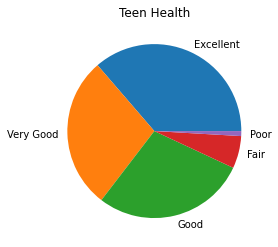

In [381]:
teenEPie = genTeenE/totalTeen
teenVGPie = genTeenVG/totalTeen
teenGPie = genTeenG/totalTeen
teenFPie = genTeenF/totalTeen
teenPPie = genTeenP/totalTeen

y = np.array([teenEPie,teenVGPie,teenGPie,teenFPie,teenPPie])
myLabels = ['Excellent','Very Good','Good','Fair','Poor']

plt.pie(y,labels = myLabels, normalize = False)
plt.title('Teen Health')
plt.show()

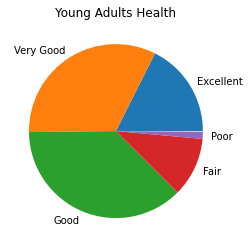

In [380]:
YAEPie = genYAE/totalYA
YAVGPie = genYAVG/totalYA
YAGPie = genYAG/totalYA
YAFPie = genYAF/totalYA
YAPPie = genYAP/totalYA

y = np.array([YAEPie,YAVGPie,YAGPie,YAFPie,YAPPie])
myLabels = ['Excellent','Very Good','Good','Fair','Poor']

plt.pie(y,labels = myLabels, normalize = False)
plt.title('Young Adults Health')
plt.show()

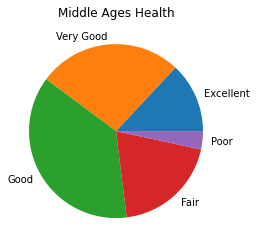

In [379]:
MAEPie = genMAE/totalMA
MAVGPie = genMAVG/totalMA
MAGPie = genMAG/totalMA
MAFPie = genMAF/totalMA
MAPPie = genMAP/totalMA

y = np.array([MAEPie,MAVGPie,MAGPie,MAFPie,MAPPie])
myLabels = ['Excellent','Very Good','Good','Fair','Poor']

plt.pie(y,labels = myLabels, normalize = False)
plt.title('Middle Ages Health')
plt.show()

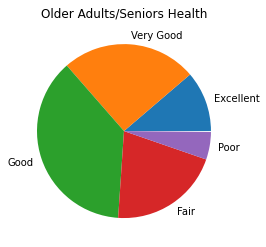

In [378]:
OAEPie = genOAE/totalOA
OAVGPie = genOAVG/totalOA
OAGPie = genOAG/totalOA
OAFPie = genOAF/totalOA
OAPPie = genOAP/totalOA

y = np.array([OAEPie,OAVGPie,OAGPie,OAFPie,OAPPie])
myLabels = ['Excellent','Very Good','Good','Fair','Poor']

plt.pie(y,labels = myLabels, normalize = False,)
plt.title('Older Adults/Seniors Health')
plt.show()

# Create Charts for Alcohol Intake

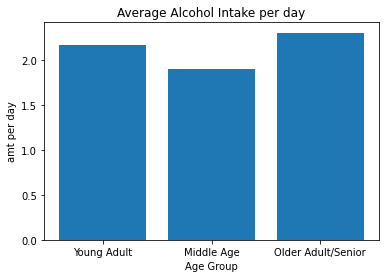

In [373]:
xaxis = ['Young Adult','Middle Age','Older Adult/Senior']
yaxis = [avgalcYA,avgalcMA,avgalcOA]

plt.bar(xaxis,yaxis)
plt.title('Average Alcohol Intake per day')
plt.xlabel('Age Group')
plt.ylabel('amt per day')
plt.show()

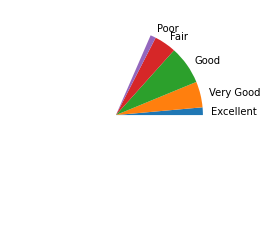

In [395]:
dietteenEPie = dietTeenE/totalTeen
dietteenVGPie = dietTeenVG/totalTeen
dietteenGPie = dietTeenG/totalTeen
dietteenFPie = dietTeenF/totalTeen
dietteenPPie = dietTeenP/totalTeen

y = np.array([dietteenEPie,dietteenVGPie,dietteenGPie,dietteenFPie,dietteenPPie])
myLabels = ['Excellent','Very Good','Good','Fair','Poor']

plt.pie(y,labels = myLabels, normalize=False)
plt.show()

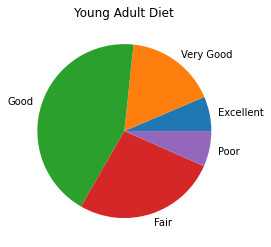

In [391]:
dietYAEPie = dietYAE/totalYA
dietYAVGPie = dietYAVG/totalYA
dietYAGPie = dietYAG/totalYA
dietYAFPie = dietYAF/totalYA
dietYAPPie = dietYAP/totalYA

y = np.array([dietYAEPie,dietYAVGPie,dietYAGPie,dietYAFPie,dietYAPPie])
myLabels = ['Excellent','Very Good','Good','Fair','Poor']

plt.pie(y,labels = myLabels, normalize = False)
plt.title('Young Adult Diet')
plt.show()

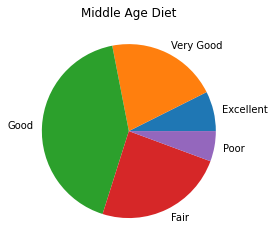

In [390]:
dietMAEPie = dietMAE/totalMA
dietMAVGPie = dietMAVG/totalMA
dietMAGPie = dietMAG/totalMA
dietMAFPie = dietMAF/totalMA
dietMAPPie = dietMAP/totalMA

y = np.array([dietMAEPie,dietMAVGPie,dietMAGPie,dietMAFPie,dietMAPPie])
myLabels = ['Excellent','Very Good','Good','Fair','Poor']

plt.pie(y,labels = myLabels, normalize = False)
plt.title('Middle Age Diet')
plt.show()

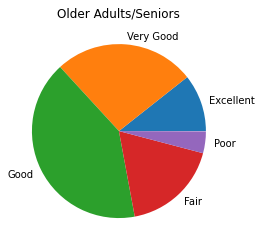

In [417]:
dietOAEPie = dietOAE/totalOA
dietOAVGPie = dietOAVG/totalOA
dietOAGPie = dietOAG/totalOA
dietOAFPie = dietOAF/totalOA
dietOAPPie = dietOAP/totalOA

y = np.array([dietOAEPie,dietOAVGPie,dietOAGPie,dietOAFPie,dietOAPPie])
myLabels = ['Excellent','Very Good','Good','Fair','Poor']

plt.pie(y,labels = myLabels, normalize=False)
plt.title('Older Adults/Seniors')
plt.show()

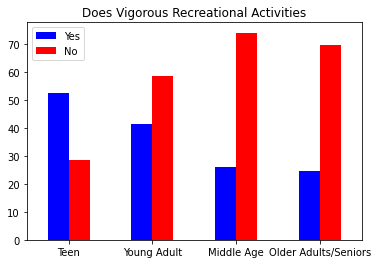

In [418]:
teenYes = (exerciseCountTeen['Vigorous recreational activities'].value_counts()['Yes']/totalTeen)*100
teenNo = (exerciseCountTeen['Vigorous recreational activities'].value_counts()['No']/totalTeen)*100

yaYes = (exerciseCountYA['Vigorous recreational activities'].value_counts()['Yes']/totalYA)*100
yaNo = (exerciseCountYA['Vigorous recreational activities'].value_counts()['No']/totalYA)*100

maYes = (exerciseCountMA['Vigorous recreational activities'].value_counts()['Yes']/totalMA)*100
maNo = (exerciseCountMA['Vigorous recreational activities'].value_counts()['No']/totalMA)*100

oaYes = (exerciseCountMA['Vigorous recreational activities'].value_counts()['Yes']/totalOA)*100
oaNo = (exerciseCountMA['Vigorous recreational activities'].value_counts()['No']/totalOA)*100

index = ['Teen','Young Adult', 'Middle Age', 'Older Adults/Seniors']
yesVR = pd.Series([teenYes,yaYes,maYes,oaYes],index = index)
noVR = pd.Series([teenNo,yaNo,maNo,oaNo],index=index)

newdf = pd.DataFrame({'Yes':yesVR,'No':noVR})
ax = newdf.plot.bar(color = ['b','r'],rot=0,title = 'Does Vigorous Recreational Activities')
ax.set_xlabel = 'Count'
ax.set_ylabel = 'Age Group'
plt.show()

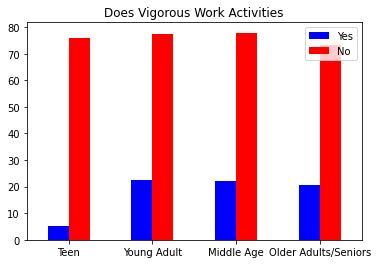

In [419]:
teenYesVW = (exerciseCountTeen['Vigorous work activity'].value_counts()['Yes']/totalTeen)*100
teenNoVW = (exerciseCountTeen['Vigorous work activity'].value_counts()['No']/totalTeen)*100

yaYesVW = (exerciseCountYA['Vigorous work activity'].value_counts()['Yes']/totalYA)*100
yaNoVW = (exerciseCountYA['Vigorous work activity'].value_counts()['No']/totalYA)*100

maYesVW = (exerciseCountMA['Vigorous work activity'].value_counts()['Yes']/totalMA)*100
maNoVW = (exerciseCountMA['Vigorous work activity'].value_counts()['No']/totalMA)*100

oaYesVW = (exerciseCountMA['Vigorous work activity'].value_counts()['Yes']/totalOA)*100
oaNoVW = (exerciseCountMA['Vigorous work activity'].value_counts()['No']/totalOA)*100

index = ['Teen','Young Adult', 'Middle Age', 'Older Adults/Seniors']
yesVW = pd.Series([teenYesVW,yaYesVW,maYesVW,oaYesVW],index = index)
noVW= pd.Series([teenNoVW,yaNoVW,maNoVW,oaNoVW],index=index)

newdf = pd.DataFrame({'Yes':yesVW,'No':noVW})
ax = newdf.plot.bar(color = ['b','r'],rot=0,title = 'Does Vigorous Work Activities')
ax.set_xlabel = 'Count'
ax.set_ylabel = 'Age Group'
plt.show()

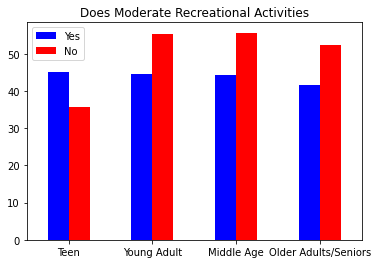

In [420]:
teenYesMR = (exerciseCountTeen['Moderate recreational activities'].value_counts()['Yes']/totalTeen)*100
teenNoMR = (exerciseCountTeen['Moderate recreational activities'].value_counts()['No']/totalTeen)*100

yaYesMR = (exerciseCountYA['Moderate recreational activities'].value_counts()['Yes']/totalYA)*100
yaNoMR = (exerciseCountYA['Moderate recreational activities'].value_counts()['No']/totalYA)*100

maYesMR = (exerciseCountMA['Moderate recreational activities'].value_counts()['Yes']/totalMA)*100
maNoMR = (exerciseCountMA['Moderate recreational activities'].value_counts()['No']/totalMA)*100

oaYesMR = (exerciseCountMA['Moderate recreational activities'].value_counts()['Yes']/totalOA)*100
oaNoMR = (exerciseCountMA['Moderate recreational activities'].value_counts()['No']/totalOA)*100

index = ['Teen','Young Adult', 'Middle Age', 'Older Adults/Seniors']
yesMR = pd.Series([teenYesMR,yaYesMR,maYesMR,oaYesMR],index = index)
noMR = pd.Series([teenNoMR,yaNoMR,maNoMR,oaNoMR],index=index)

newdf = pd.DataFrame({'Yes':yesMR,'No':noMR})
ax = newdf.plot.bar(color = ['b','r'],rot=0,title = 'Does Moderate Recreational Activities')
ax.set_xlabel = 'Count'
ax.set_ylabel = 'Age Group'
plt.show()

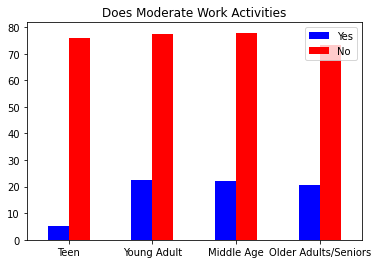

In [422]:
teenYesMW = (exerciseCountTeen['Moderate work activity'].value_counts()['Yes']/totalTeen)*100
teenNoMW = (exerciseCountTeen['Moderate work activity'].value_counts()['No']/totalTeen)*100

yaYesMW = (exerciseCountYA['Moderate work activity'].value_counts()['Yes']/totalYA)*100
yaNoMW = (exerciseCountYA['Moderate work activity'].value_counts()['No']/totalYA)*100

maYesMW = (exerciseCountMA['Moderate work activity'].value_counts()['Yes']/totalMA)*100
maNoMW = (exerciseCountMA['Moderate work activity'].value_counts()['No']/totalMA)*100

oaYesMW = (exerciseCountMA['Moderate work activity'].value_counts()['Yes']/totalOA)*100
oaNoMW = (exerciseCountMA['Moderate work activity'].value_counts()['No']/totalOA)*100


index = ['Teen','Young Adult', 'Middle Age', 'Older Adults/Seniors']
yesMW = pd.Series([teenYesMW,yaYesMW,maYesMW,oaYesMW],index = index)
noMW = pd.Series([teenNoMW,yaNoMW,maNoMW,oaNoMW],index=index)

newdf = pd.DataFrame({'Yes':yesVW,'No':noVW})
ax = newdf.plot.bar(color = ['b','r'],rot=0,title = 'Does Moderate Work Activities')
ax.set_xlabel = 'Count'
ax.set_ylabel = 'Age Group'
plt.show()


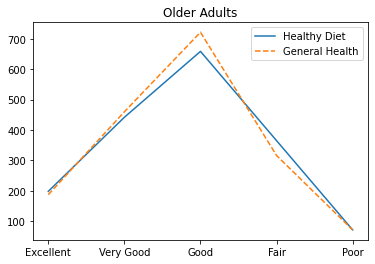

In [431]:
x = ['Excellent','Very Good','Good','Fair','Poor']
x2 = [dietOAE,dietOAVG,dietOAG,dietOAF,dietOAP]
y2 = [genOAE,genOAVG,genOAG,genOAF,dietOAP]

plt.plot(x, y2, label = "Healthy Diet", linestyle="-")
plt.plot(x, x2, label = "General Health", linestyle="--")
plt.title('Older Adults')
plt.legend()
plt.show()

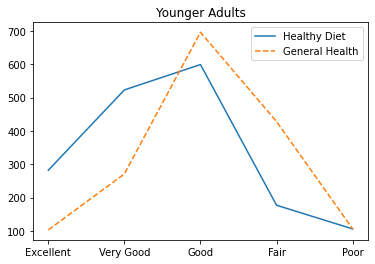

In [434]:
x = ['Excellent','Very Good','Good','Fair','Poor']
x2 = [dietYAE,dietYAVG,dietYAG,dietYAF,dietYAP]
y2 = [genYAE,genYAVG,genYAG,genYAF,dietYAP]

plt.plot(x, y2, label = "Healthy Diet", linestyle="-")
plt.plot(x, x2, label = "General Health", linestyle="--")
plt.title('Younger Adults')
plt.legend()
plt.show()

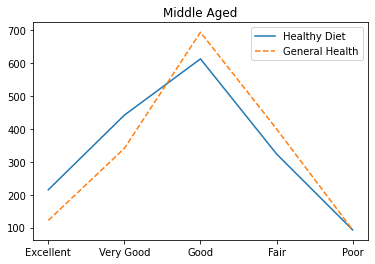

In [433]:
x = ['Excellent','Very Good','Good','Fair','Poor']
x2 = [dietMAE,dietMAVG,dietMAG,dietMAF,dietMAP]
y2 = [genMAE,genMAVG,genMAG,genMAF,dietMAP]

plt.plot(x, y2, label = "Healthy Diet", linestyle="-")
plt.plot(x, x2, label = "General Health", linestyle="--")
plt.title('Middle Aged')
plt.legend()
plt.show()